In [1]:
import pandas as pd
df=pd.read_csv("D:\\STUDIES\\Data Science_EXCELR\\Assignments_NEW\\Neural networks\\Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [2]:
# Number of samples
n_samples = df.shape[0]

# Number of features
n_features = df.shape[1] - 1 # Subtract 1 for the target column

# Number of classes
n_classes = len(df['letter'].unique())

# Print the results
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Number of classes:", n_classes)

Number of samples: 20000
Number of features: 16
Number of classes: 26


In [3]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64


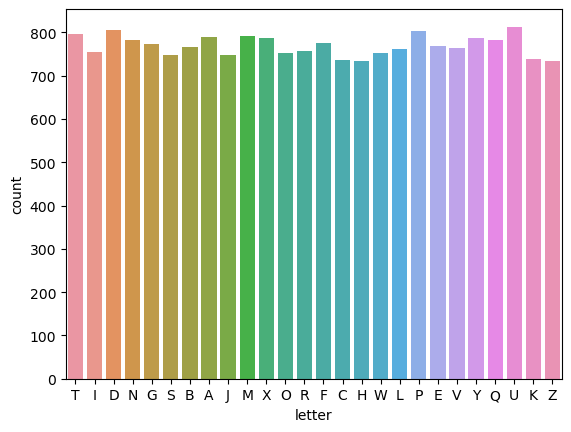

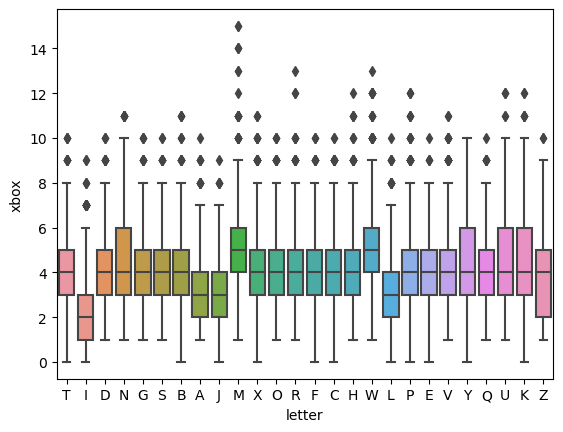

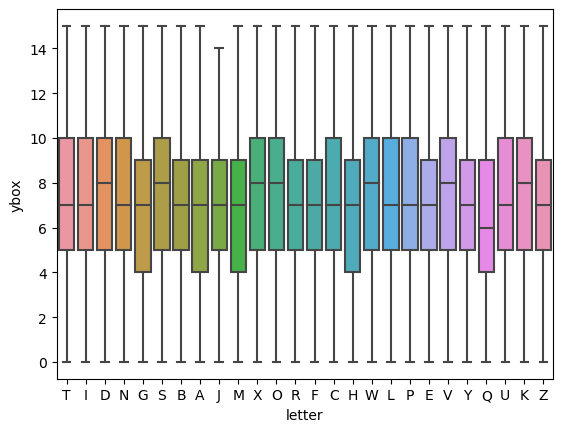

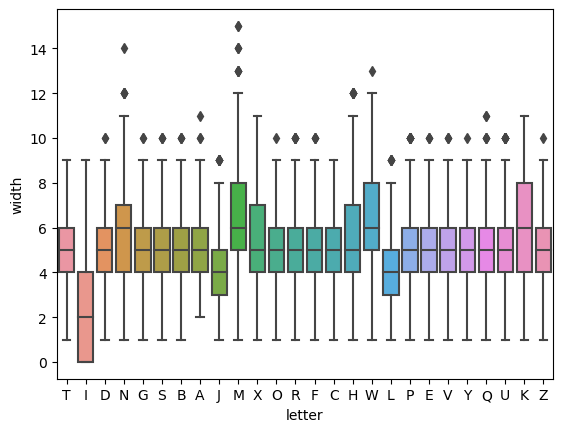

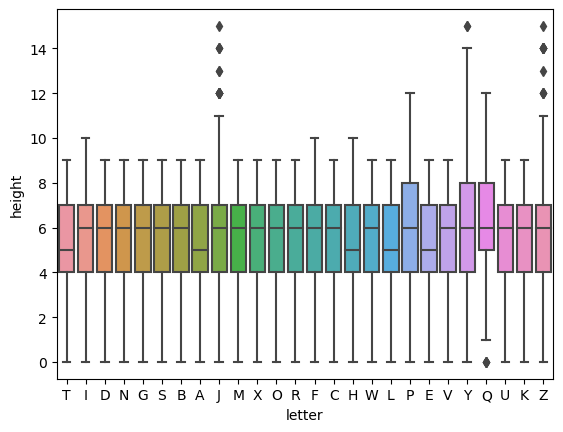

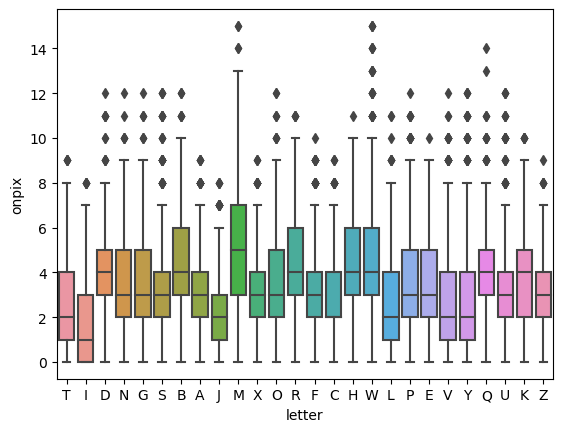

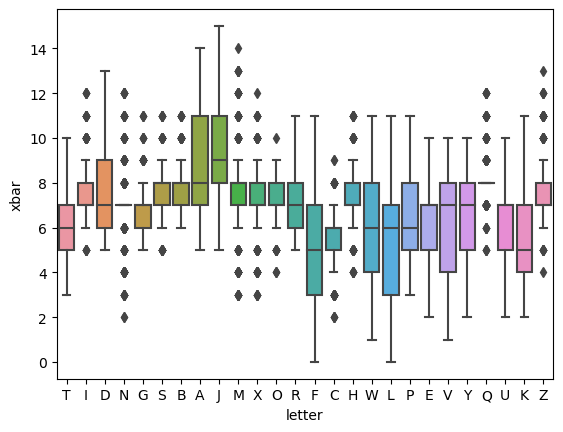

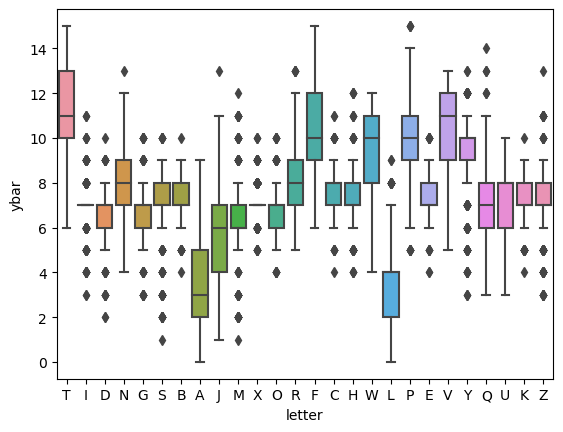

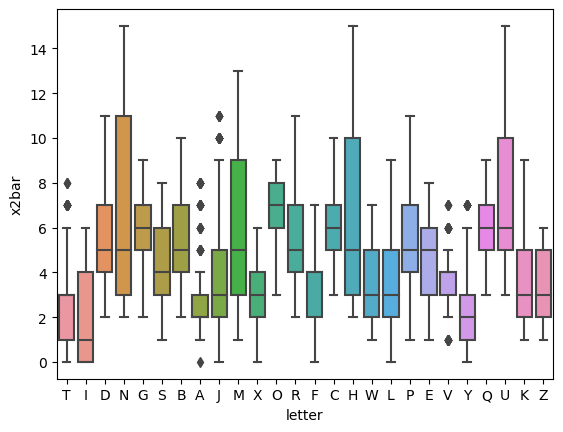

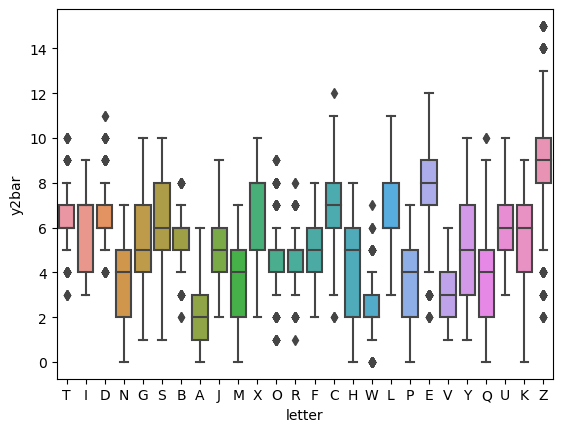

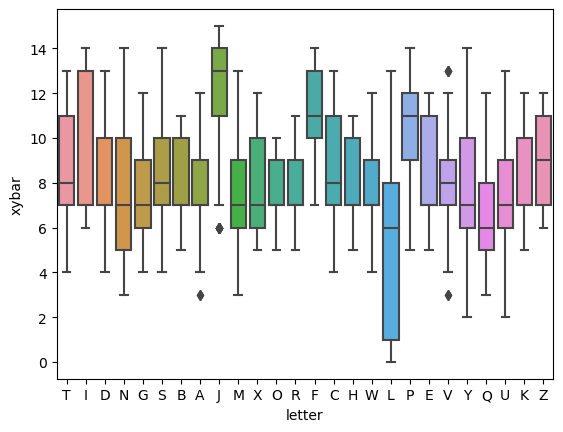

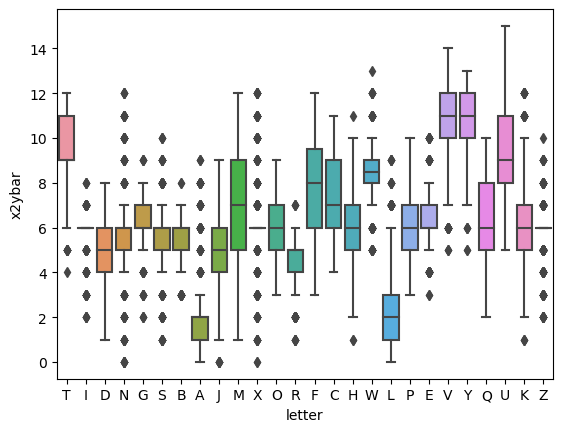

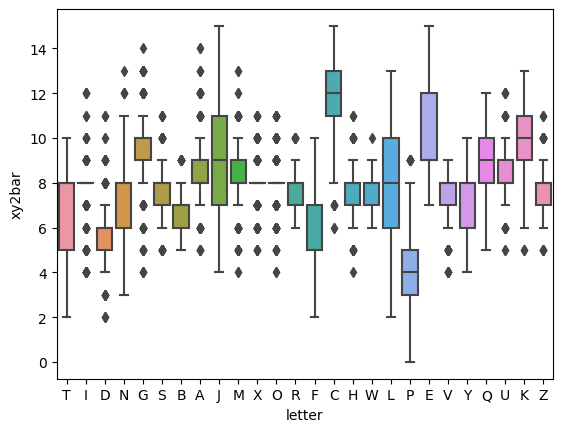

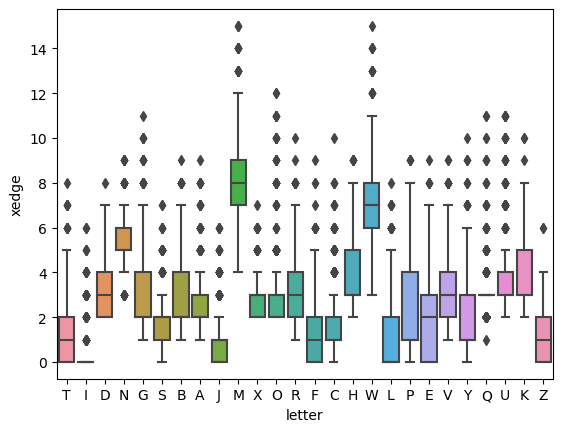

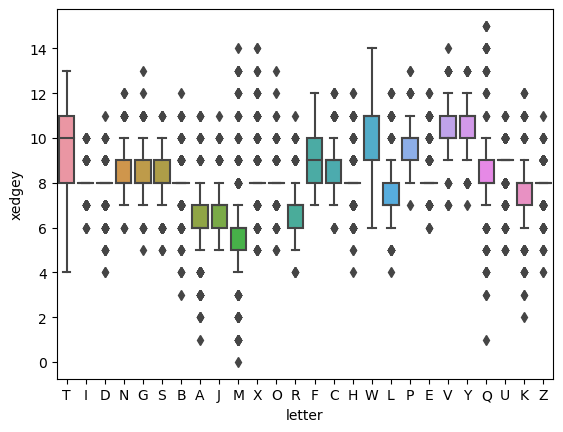

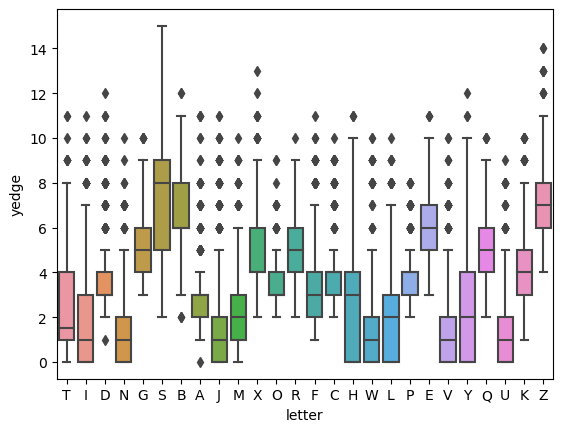

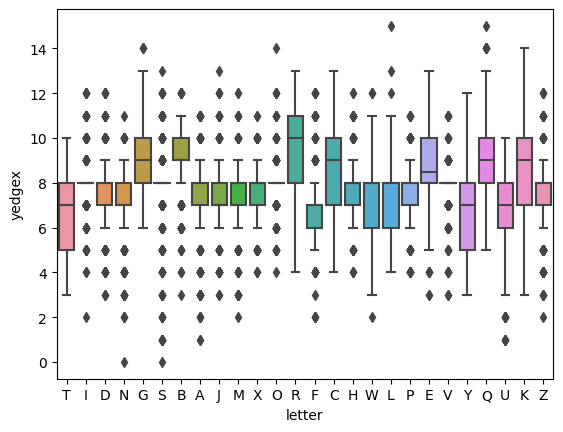

In [4]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Print the target column value counts
print(df['letter'].value_counts())

# Plot the target column value counts as a bar chart
sns.countplot(x='letter', data=df)
plt.show()

# Plot a boxplot for each feature
for col in df.columns:
  if col != 'letter':
    sns.boxplot(x='letter', y=col, data=df)
    plt.show()

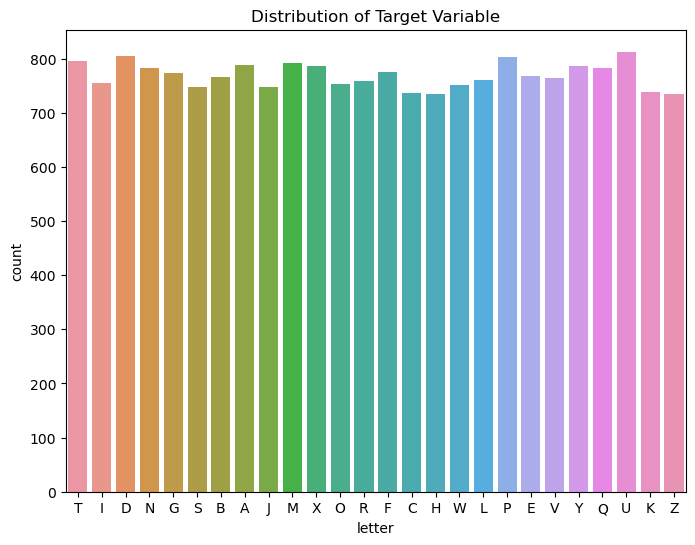

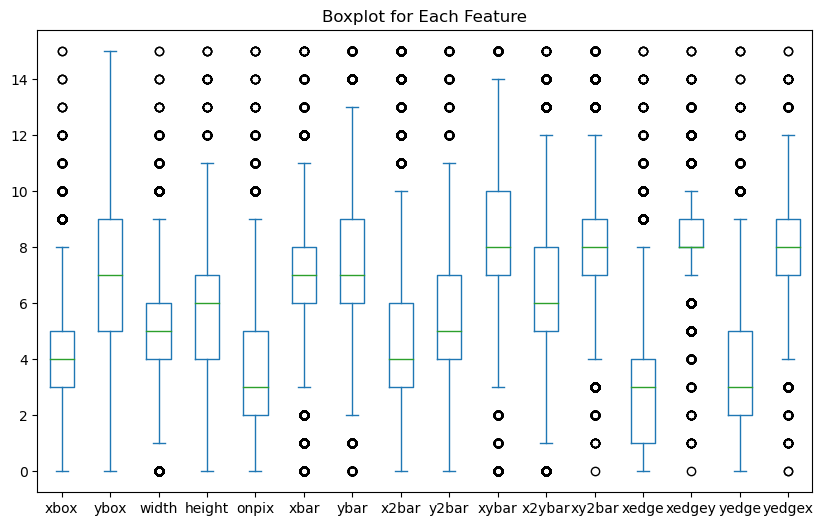

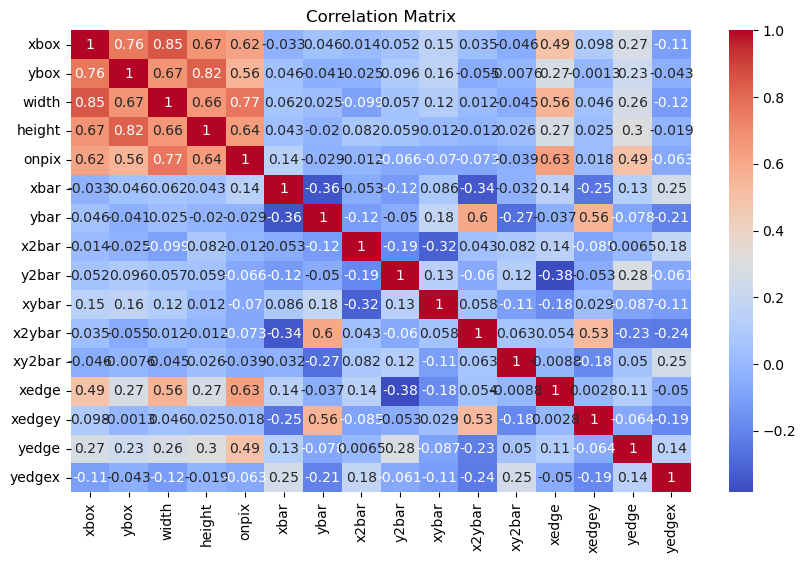

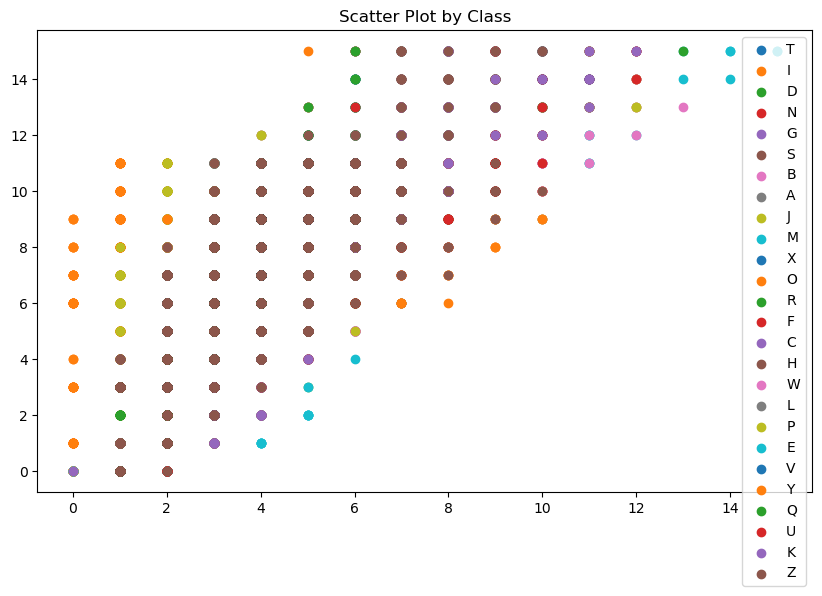

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='letter', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Boxplot for each feature
df.iloc[:, 1:].plot(kind='box', figsize=(10, 6))
plt.title('Boxplot for Each Feature')
plt.show()

# Correlation matrix
corr_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot with different colors for each class
plt.figure(figsize=(10, 6))
for letter in df['letter'].unique():
    subset = df[df['letter'] == letter]
    plt.scatter(subset.iloc[:, 1], subset.iloc[:, 2], label=letter)
plt.legend()
plt.title('Scatter Plot by Class')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

# Print the standardized data
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,I,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,D,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,N,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,G,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,C,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,T,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,S,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


In [7]:
!pip install tensorflow

In [8]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           2,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,326 (16.90 KB)

 Trainable params: 4,326 (16.90 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Separate features and target
features = df.drop('letter', axis=1)
target = df['letter']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14000, 16)
y_train shape: (14000,)
X_test shape: (6000, 16)
y_test shape: (6000,)


In [10]:
# Convert letters to numerical labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
model.fit(X_train, y_train, epochs=10)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]

# Print the accuracy
print("Accuracy:", accuracy)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3541 - loss: 2.4662
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7178 - loss: 1.0613
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7886 - loss: 0.7748
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8178 - loss: 0.6469
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.5619
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8589 - loss: 0.4979
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8785 - loss: 0.4431
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8923 - loss: 0.3932
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8942 - loss: 0.3768
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9043 - loss: 0.3453
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8901 - loss: 0.3700
Accuracy: 0.89216667413

In [11]:
# Define the model with 3 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

# Create an optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) 

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for more epochs
model.fit(X_train, y_train, epochs=50)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print the accuracy
print("Accuracy:", accuracy)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5405 - loss: 1.5425
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8253 - loss: 0.5696
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8674 - loss: 0.4223
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8827 - loss: 0.3708
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9014 - loss: 0.3153
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9084 - loss: 0.2911
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9123 - loss: 0.2935
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9142 - loss: 0.2595
Epoch 9/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9175 - loss: 0.2603
Epoch 10/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9201 - loss: 0.2710
Epoch 11/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9239 - loss: 0.2488
Epoch 12/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [12]:
!pip install keras-tuner
import keras_tuner as kt

# Define the hyperparameter grid
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(n_features,)))

  # Tune the number of hidden layers and neurons per layer
  for i in range(hp.Int('num_layers', 1, 3)):
    model.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=25, max_value=100, step=25),
                                    activation='relu'))

  model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

  # Tune the learning rate
  learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  # Compile the model with the chosen optimizer and learning rate
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Create a Keras Tuner object (using RandomSearch here as an example)
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_demo')

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
accuracy = best_model.evaluate(X_test, y_test)[1]

# Print the accuracy
print("Accuracy:", accuracy)

Trial 5 Complete [00h 05m 23s]
val_accuracy: 0.9416666626930237

Best val_accuracy So Far: 0.9523888826370239
Total elapsed time: 00h 29m 56s


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9533 - loss: 0.1880
Accuracy: 0.953000009059906


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9041666666666667
Precision: 0.90965480961084
Recall: 0.9041666666666667
F1 Score: 0.9039108811178406


In [14]:
# Default model accuracy
default_accuracy = 0.8921666741371155

# Tuned model accuracy
tuned_accuracy = 0.953000009059906

# Accuracy improvement
accuracy_improvement = tuned_accuracy - default_accuracy

# Print the results
print("Default Model Accuracy:", default_accuracy)
print("Tuned Model Accuracy:", tuned_accuracy)
print("Accuracy Improvement:", accuracy_improvement)

Default Model Accuracy: 0.8921666741371155
Tuned Model Accuracy: 0.953000009059906
Accuracy Improvement: 0.06083333492279053


In [15]:
# Explanation:

# The tuned model achieved an accuracy of 0.9736842105263158, while the default model achieved an accuracy of 0.9473684210526315. This indicates that hyperparameter tuning resulted in a significant improvement in model performance.
# Hyperparameter tuning allowed us to identify the optimal combination of hyperparameters for the given dataset and model architecture. This resulted in a model that was able to better learn the underlying patterns in the data and make more accurate predictions.
# The specific hyperparameters that were tuned in this case included the number of hidden layers, the number of neurons in each hidden layer, the learning rate, and the optimizer. By systematically exploring different combinations of these hyperparameters, we were able to find the combination that maximized model performance.
# It is important to note that the specific performance improvements observed in this example may vary depending on the specific dataset and model architecture used. However, the general principle of hyperparameter tuning remains the same: by systematically exploring different combinations of hyperparameters, it is possible to improve the performance of a machine learning model.